# Вычисления для теоретико-игровой модели

Текст работы со всеми пояснениями можно посмотреть [здесь](https://github.com/Seiron/coursework/blob/main/vkr.pdf)

### Загрузка необходимых библиотек

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, simplify, Eq, solve, collect
np.seterr(divide='ignore')

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

### Обозначения
$c$ - издержки  
$\tau$ - комиссии   
$t$ - издержки перемещения по спице (издержки поиска товаров вследствие неидеального мэтчинга)  
$b$ - степень предвзятости владельца маркетплейса (степень предвзятости алгоритма поиска товаров)   
$\mu$ - доля информированных потребителей, то есть таких потребителей, которые знают о товаре продавца, даже если он не представлен на платформе    
$p_A$ - цена, устанавливаемая продавцом А   
$p^*$ - цена, устанавливаемая в равновесии продавцами B, C 


In [16]:
t, p_A, p_star, b, c, tau, mu, x = symbols('t p_A p_star b c tau mu x')

### Случай №1 (Все продавцы на платформе, владелец маркетплейса не вмешивается)

Формулы прибылей продавцов в таком случае будут выглядеть так (рассматриваем относительно игрока А):
$$\pi_A = (\frac 1 {4t}(t-p_A+p_B)+\frac 1 {4t}(t-p_A+p_C))((1-\tau)p_A-c)$$

Следовательно, цену продавцы определяют следующим образом:

$$p_A = arg\max_p ((\frac 1 {2t}(t-p+p^*))((1-\tau)p^-c))$$

In [17]:
pi_A_1 = ((t-p_A+p_star)/(2*t))*((1-tau)*p_A-c)

pi_A_1_diff = (pi_A_1.diff(p_A))

pi_A_1_diff_subs = pi_A_1_diff.subs(p_A, p_star)

print(solve(pi_A_1_diff_subs, p_star))

[(-c + t*tau - t)/(tau - 1)]


$$\pi_A=\pi_B=\pi_C = \frac {t(1-\tau)} 2$$

### Случай №2: продавцы B, C на платформе, А продает через прямой канал продаж

Формулы прибылей продавцов:
$$\pi_A = (\frac \mu {2t}(t-p_A+p^*))(p_A-c)$$
$$\pi_B  = (\frac {1-\mu} {2}+ \frac \mu {4t}(t-p_B+p_A)+\frac 1 {4t}(t-p_B+p_С))((1-\tau)p_B-c)$$
$$\pi_C  = (\frac {1-\mu} {2}+ \frac \mu {4t}(t-p_C+p_A)+\frac 1 {4t}(t-p_C+p_B))((1-\tau)p_C-c)$$

Устанавливаемые в равновесии цены:
$$p_A = arg\max_p(\frac \mu {2t}(t-p_A+p^*))(p_A-c))$$
$$p^* = arg\max_p((\frac {1-\mu} 2 + \frac \mu {4t}(t-p+p_A)+\frac 1 {4t}(t-p+p^*))((1-\tau)p-c))$$


In [18]:
pi_A_2 = (mu*(t-p_A+p_star)/(2*t))*(p_A-c)
pi_A_2_diff = (pi_A_2.diff(p_A))
pi_A_2_solved = solve(pi_A_2_diff, p_A)


pi_star_2 = ((1-mu)/2+mu/2*(t-p_star+p_A)/(2*t)+1/4)*((1-tau)*p_star-c)
pi_star_2_diff = pi_star_2.diff(p_star)
pi_star_2_subs = pi_star_2_diff.subs(p_A,pi_A_2_solved[0])
pi_star_2_solved = solve(pi_star_2_subs, p_star, rational=True)


pi_A_2_solved_2 = pi_A_2_solved[0].subs(p_star, pi_star_2_solved[0], rational=True)


task_2 = [pi_A_2_diff, pi_A_2_solved, pi_star_2_diff, pi_star_2_subs, pi_star_2_solved, pi_A_2_solved_2]

for i, j in enumerate(task_2):
    print(f"{i+1}. {j}")

1. -mu*(-c + p_A)/(2*t) + mu*(-p_A + p_star + t)/(2*t)
2. [c/2 + p_star/2 + t/2]
3. -mu*(-c + p_star*(1 - tau))/(4*t) + (1 - tau)*(-mu/2 + mu*(p_A - p_star + t)/(4*t) + 0.75)
4. -mu*(-c + p_star*(1 - tau))/(4*t) + (1 - tau)*(-mu/2 + mu*(c/2 - p_star/2 + 3*t/2)/(4*t) + 0.75)
5. [(c*mu*tau - 3*c*mu - mu*t*tau + mu*t + 6*t*tau - 6*t)/(3*mu*(tau - 1))]
6. c/2 + t/2 + (c*mu*tau - 3*c*mu - mu*t*tau + mu*t + 6*t*tau - 6*t)/(6*mu*(tau - 1))


### Случай №3: Случай №3: смешанный режим платформы

Формулы прибылей продавцов:
$$\pi_M=(\frac 1 {2t}(t-p_M+p^*)+b)(p_M-c-\tau p^*)+\frac 3 2\tau p^*$$
$$\pi_B = (\frac 1 4+\frac 1 {4t}(t-p^*+p_A)-\frac b 2)((1-\tau)p^*-c)$$
$$\pi_C = (\frac 1 4+\frac 1 {4t}(t-p^*+p_A)-\frac b 2)((1-\tau)p^*-c)$$

In [19]:
pi_A_3 = (1/(2*t)*(t-p_A+p_star)+b)*(p_A-c-tau*p_star) + 3/2*tau*p_star
pi_A_3_diff = (pi_A_3.diff(p_A))
pi_A_3_solved = solve(pi_A_3_diff,p_A)


pi_star_3 = (1/4+1/(4*t)*(t-p_star+p_A)-b/2)*((1-tau)*p_star-c)
pi_star_3_diff = (pi_star_3.diff(p_star))
pi_star_3_subs = (pi_star_3_diff.subs(p_A,pi_A_3_solved[0]))
pi_star_3_solved = solve(pi_star_3_subs, p_star)


pi_A_3_solved_2 = pi_A_3_solved[0].subs(p_star, pi_star_3_solved[0])

task_3 = [pi_A_3_diff, pi_A_3_solved, pi_star_3_diff, pi_star_3_subs, pi_star_3_solved, pi_A_3_solved_2]

for i, j in enumerate(task_3):
    print(f"{i+1}. {j}")

1. b - (-c + p_A - p_star*tau)/(2*t) + (-p_A + p_star + t)/(2*t)
2. [b*t + c/2 + p_star*tau/2 + p_star/2 + t/2]
3. (1 - tau)*(-b/2 + 0.25 + (p_A - p_star + t)/(4*t)) - (-c + p_star*(1 - tau))/(4*t)
4. (1 - tau)*(-b/2 + 0.25 + (b*t + c/2 + p_star*tau/2 - p_star/2 + 3*t/2)/(4*t)) - (-c + p_star*(1 - tau))/(4*t)
5. [(2.0*b*t*tau - 2.0*b*t - c*tau + 3.0*c - 5.0*t*tau + 5.0*t)/(tau**2 - 4.0*tau + 3.0)]
6. b*t + c/2 + t/2 + tau*(2.0*b*t*tau - 2.0*b*t - c*tau + 3.0*c - 5.0*t*tau + 5.0*t)/(2*(tau**2 - 4.0*tau + 3.0)) + (2.0*b*t*tau - 2.0*b*t - c*tau + 3.0*c - 5.0*t*tau + 5.0*t)/(2*(tau**2 - 4.0*tau + 3.0))


### Решения продавца А

Найдем, какое решение принимает продавец А в зависимости от переменных $\mu$ и $\tau$. Для каждой пары переменных продавец будет сранивать прибыль в Случае №1 и Случае №2. График зависимости $\tau$ от $\mu$ будет выглядеть следующим образом:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


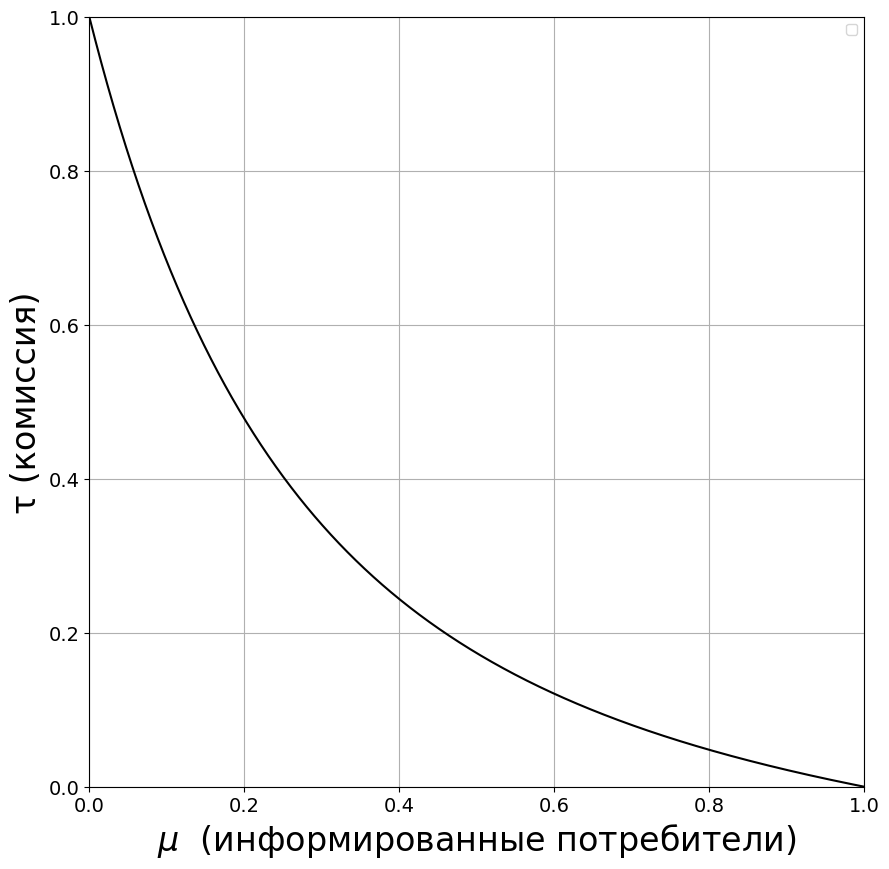

In [20]:
def tau_1(mu):
    return -((mu * (mu + 4)**2) / (3*mu + 2)**2) + 1


mu_values = np.linspace(0, 1, 3000)
tau_values = tau_1(mu_values)


plt.figure(figsize=(10, 10))
plt.plot(mu_values, tau_values, color='black')
plt.xlabel('$\mu$  (информированные потребители)',fontsize=24)
plt.ylabel('τ (комиссия)',fontsize=24)
plt.legend()
plt.tick_params(axis='both', which='major', labelsize=14)
plt.ylim(top=1,bottom=0)
plt.xlim(left=0,right=1)
plt.grid(True)


plt.show()

### Решения владельца маркетплейса

Аналогично, владелец маркетплейса сравнивает прибыли в каждой точке при реализации Случая №2 и Случая №3 (Случая №1 при участии владельца платформы вообще не может быть, см. работу, следует из формул прибыли в Случаях №1 и №3). Но владелец маркетплейса также должен учитывать при сравнении, что при покупке продавца А он должен будет компенсировать продавцу упущенную прибыль при заданных $\mu$ и $\tau$ (выражено слагаемым E2): 

(-mu*t*(2.0*b*t*tau**2 - 4.0*b*t*tau + 2.0*b*t - 2.0*t*tau**2 - 2.0*t*tau + 4.0*t)/(tau**2 - 4.0*tau + 3.0) + 3.0*t*tau*(2.0*b*t*tau**2 - 4.0*b*t*tau + 2.0*b*t - 2.0*t*tau**2 - 2.0*t*tau + 4.0*t)/(tau**2 - 4.0*tau + 3.0) - (2*b*t + t)*(tau*(2.0*b*t*tau**2 - 4.0*b*t*tau + 2.0*b*t - 2.0*t*tau**2 - 2.0*t*tau + 4.0*t)/(tau**2 - 4.0*tau + 3.0) - (2.0*b*t*tau**2 - 4.0*b*t*tau + 2.0*b*t - 2.0*t*tau**2 - 2.0*t*tau + 4.0*t)/(tau**2 - 4.0*tau + 3.0)))/(2*t)


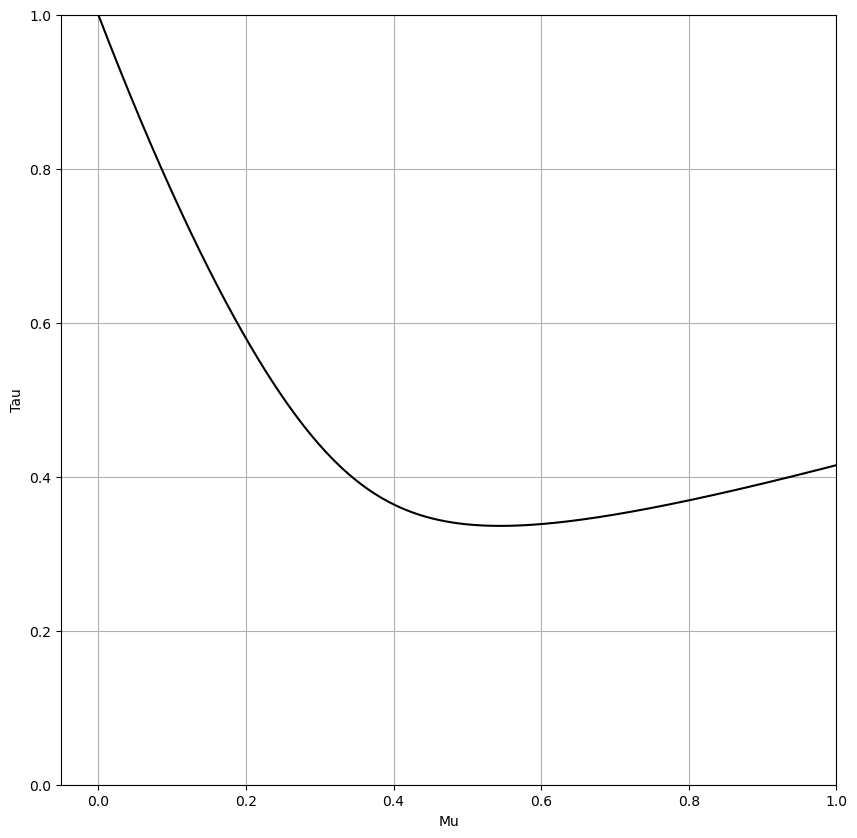

In [21]:
E1 = ((1/(2*t))*(t - p_A + p_star) + b)*(p_A - c - tau*p_star) + (3/2)*tau*p_star
E2 =  ((mu/(2*t))*(t - p_A + p_star))*(p_A - c)


E_diff = simplify(E1 - E2)
b_value = -0.3
E_diff_c0 = E_diff.subs([[c, 0],[b,b_value]])
equation = (E_diff_c0 - (3/2 - (mu/(2*t)) * (4 + mu)*t / (2 + 3*mu)) * tau * ((6 - mu)*t / (2 + 3*mu)))
pi_M = (3/2 - (mu/(2*t)) * (4 + mu)*t / (2 + 3*mu)) * tau * ((6 - mu)*t / (2 + 3*mu))
tau_solution = solve(equation, tau,rational=True)
t_value=t


p_star_expr = (2.0*b*t*tau**2 - 4.0*b*t*tau + 2.0*b*t - c*tau + 3.0*c - 2.0*t*tau**2 - 2.0*t*tau + 4.0*t)/(tau**2 - 4.0*tau + 3.0)
p_A_expr = (2.0*b*t*tau**2 - 4.0*b*t*tau + 2.0*b*t - c*tau + 3.0*c - 2.0*t*tau**2 - 2.0*t*tau + 4.0*t)/(tau**2 - 4.0*tau + 3.0)
print(E_diff.subs([(p_star, p_star_expr),(p_A,p_A_expr),(c,0)]))
p_star_expr_c0_t1 = p_star_expr.subs([(c, 0),(b,b_value)])
p_A_expr_c0_t1 = p_A_expr.subs([(c, 0),(b,b_value)])


E_diff_substituted = (equation.subs([(p_star, p_star_expr_c0_t1), (p_A, p_A_expr_c0_t1)]))
tau_solution_new = solve(E_diff_substituted,tau, rational=True)

mu_values = np.linspace(0, 1, 3000)

# Вычисляем tau для каждого значения mu используя два решения
tau_solutions_1 = [(tau_solution_new[1].subs([(b, b_value), (mu, mu_val)]).evalf()) for mu_val in mu_values]
tau_solutions_2 = [(tau_solution_new[0].subs([(b, b_value), (mu, mu_val)]).evalf()) for mu_val in mu_values] # Решение 2 не выводится, так как оно лежит за пре

# графики
plt.figure(figsize=(10, 10))
plt.plot(mu_values, tau_solutions_1, color='black')
plt.xlabel('Mu')
plt.ylabel('Tau')
plt.xlim(right=1)
plt.ylim(bottom=0,top=1)
plt.grid(True)
plt.show()

Получили график зависимости $\tau$ от $\mu$ для владельца маркетплейса. Теперь объединим полученные решения в один график:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


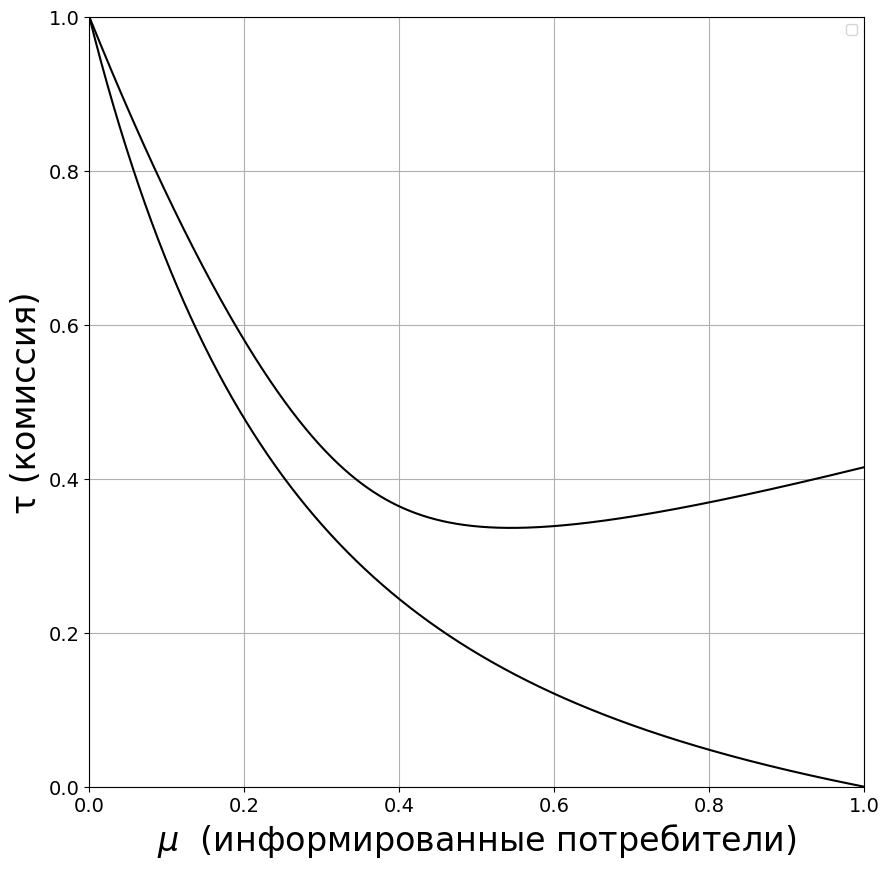

In [22]:
plt.figure(figsize=(10, 10))
plt.plot(mu_values, tau_solutions_1, color='black')
plt.plot(mu_values, tau_values, color='black')
plt.xlabel('$\mu$  (информированные потребители)',fontsize=24)
plt.ylabel('τ (комиссия)',fontsize=24)
plt.legend()
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(True)
plt.ylim(top=1, bottom=0)
plt.xlim(left=0, right=1)


plt.show()


### Анализ благосостояния

Чтобы понять, как закон о запрете смешанного режима повлияет на общественное благосостояние, вычислим разность благосостояния между Случаем №3 и Случаями №1 и №2. Заметим, что в обоих случаях выражение зависит от параметра t. Но это не мешает однозначно определить знак выражения на интересующем нас инетрвале комиссий - от 0 до 26% (Это максимум для рассматриваемых маркетплейсов + возможно, в скором времени [маркетплейсы не смогут устанавливать комиссии выше 10%](https://www.interfax.ru/russia/949012)). При увеличении t стремимся к $\tau$, которое определяется из разности $p_A$ и $p^*$. Данное $\tau$ будет разграничивать области, где выражения принимаю разные знаки (см. графики):

#### Переход от Случая №3 к Случаю №1

In [23]:
# W3-W1
x = t * (2 * b * tau - 4 * b - 2 * tau + 1) / (tau - 3)
expr = -t*((t - x)/(2*t) + b)**2 / 2 - t*((t + x)/(2*t) - b)**2 / 2 - (t/8)*x
simplified_expr = simplify(expr)
final_expr = simplify(simplified_expr - 3/2 * (-t / 4))
final_expr

t*(-8.0*b**2 - 2.0*b*t*tau**2 + 10.0*b*t*tau - 12.0*b*t + 16.0*b*tau - 8.0*b + 2.0*t*tau**2 - 7.0*t*tau + 3.0*t - 7.0*tau**2 + 2.0*tau + 7.0)/(8.0*tau**2 - 48.0*tau + 72.0)

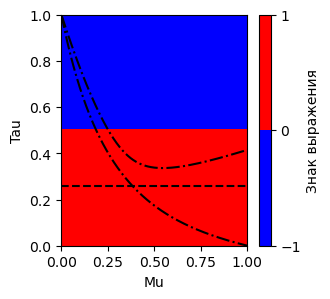

In [24]:
#W3-W1
b = 0
t = 1000 # Произвольное значение t. При больших значениях граница спускается, но не ниже определенного tau
def compute_expression(tau, b, t):
    numerator = t*(-8.0*b**2 - 2.0*b*t*tau**2 + 10.0*b*t*tau - 12.0*b*t + 16.0*b*tau - 8.0*b + 2.0*t*tau**2 - 7.0*t*tau + 3.0*t - 7.0*tau**2 + 2.0*tau + 7.0)
    denominator = 8.0*tau**2 - 48.0*tau + 72.0
    return numerator / denominator
tau = np.linspace(0, 1, 500)
Mu = np.linspace(0, 1, 500)
Tau, Mu = np.meshgrid(tau, Mu)
Z = np.sign(compute_expression(Tau, b, t))
plt.figure(figsize=(3, 3))
plt.contourf(Mu, Tau, Z, levels=[-1, 0, 1], colors=['blue', 'red'])


plt.colorbar(label='Знак выражения')
plt.xlabel('Mu')
plt.ylabel('Tau')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot(mu_values, tau_solutions_1, color='black', linestyle='-.')
plt.plot(mu_values, tau_values, color='black', linestyle='-.')
plt.axhline(y=0.26, color='black', linestyle='--')

plt.show()

#### Переход от Случая №3 к Случаю №2

In [25]:
# W3 - W2
x, tau, t = symbols('x tau t')
original_expr = - t*((t - x)/(2*t) + b)**2 / 2 - t*((t + x)/(2*t) - b)**2 / 2 - (t/8)*x
x_replacement = t * (2 * b * tau - 4 * b - 2 * tau + 1) / (tau - 3)
new_expr = original_expr.subs(x, x_replacement)
simplified_expr = simplify(new_expr)
expr_to_subtract = (mu*(10*mu*t - 21*t) - 18*t) / (72*mu)
simplified_expr = simplify(new_expr)
final_expr = simplified_expr - expr_to_subtract
final_simplified_expr = simplify(final_expr)
final_simplified_expr


t*(-9*mu*(-t*(tau - 3)*(2*tau - 1) + (tau + 2)**2 + (3*tau - 4)**2) + (tau - 3)**2*(-mu*(10*mu - 21) + 18))/(72*mu*(tau - 3)**2)

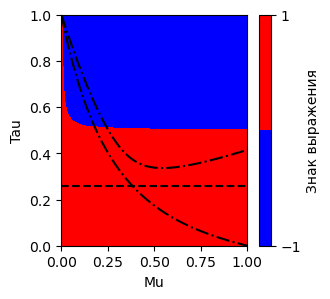

In [26]:
#WPL-W2
t = 1000
def expression(tau, mu, b=b, t=t):
    term1 = t*(-9*mu*(t*(tau - 3)*(2*b*tau - 4*b - 2*tau + 1) 
            + (-2*b*tau + 2*b*(tau - 3) + 4*b + tau + 2)**2 
            + (-2*b*tau + 2*b*(tau - 3) + 4*b + 3*tau - 4)**2) 
            + (tau - 3)**2*(-mu*(10*mu - 21) + 18))
    denominator = 72*mu*(tau - 3)**2
    return term1 / denominator
tau = np.linspace(0, 1, 500)
mu = np.linspace(0, 1, 500)
Tau, Mu = np.meshgrid(tau, mu)
Z = np.sign(expression(Tau, Mu))
plt.figure(figsize=(3, 3))
plt.contourf(Mu, Tau, Z, levels=[-1, 0, 1], colors=['blue', 'red'])


plt.colorbar(ticks=[-1, 1], label='Знак выражения')
plt.xlabel('Mu')
plt.ylabel('Tau')
plt.plot(mu_values, tau_solutions_1, color='black', linestyle='-.')
plt.plot(mu_values, tau_values, color='black', linestyle='-.')
plt.axhline(y=0.26, color='black', linestyle='--')

plt.show()

$^*$Для удобства анализа были добавлены решения игроков (чередующиеся точки и тире) и коридор комиссиий (пунктирная линия)

Итак, оказалось, что в обоих случаях введение запрета смешанного режима работы маркетплейса приводит к уменьшению общественного благосостояния